<a href="https://colab.research.google.com/github/tuyenhuynh301239851/Vietnam-War/blob/main/VietNam_War_Tuyen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
files = glob.glob('/content/sample_data/THOR_dataset/*.csv')
def read_csv(file):
    df = pd.read_csv(file, encoding = 'latin-1')
    return df

In [8]:
files

['/content/sample_data/THOR_dataset/THOR_Vietnam_Aircraft_Glossary.csv',
 '/content/sample_data/THOR_dataset/THOR_Vietnam_Bombing_Operations.csv',
 '/content/sample_data/THOR_dataset/THOR_Vietnam_Weapons_Glossary.csv']

In [9]:
df_bombing = read_csv(files[1])
df_bombing.head()

,THOR_DATA_VIET_ID,COUNTRYFLYINGMISSION,MILSERVICE,MSNDATE,SOURCEID,SOURCERECORD,VALID_AIRCRAFT_ROOT,TAKEOFFLOCATION,TGTLATDD_DDD_WGS84,TGTLONDDD_DDD_WGS84,...,GEOZONE,ID,MFUNC_DESC_CLASS,NUMWEAPONSJETTISONED,NUMWEAPONSRETURNED,RELEASEALTITUDE,RELEASEFLTSPEED,RESULTSBDA,TIMEOFFTARGET,WEAPONSLOADEDWEIGHT
0,351,UNITED STATES OF AMERICA,USAF,1971-06-05,647464,SEADAB,EC-47,TAN SON NHUT,NaN,NaN,...,NaN,27135863.0,NONKINETIC,-1.0,-1.0,NaN,NaN,NaN,1005.0,0.0
1,2,UNITED STATES OF AMERICA,USAF,1972-12-26,642778,SEADAB,EC-47,NAKHON PHANOM,NaN,NaN,...,NaN,27131177.0,NONKINETIC,-1.0,-1.0,NaN,NaN,NaN,530.0,0.0
2,3,UNITED STATES OF AMERICA,USAF,1973-07-28,642779,SEADAB,RF-4,UDORN AB,NaN,NaN,...,NaN,27131178.0,NONKINETIC,-1.0,-1.0,NaN,NaN,NaN,730.0,0.0
3,4,UNITED STATES OF AMERICA,USAF,1970-02-02,642780,SEADAB,A-1,NAKHON PHANOM,16.902500,106.014166,...,XE,27131179.0,KINETIC,-1.0,-1.0,NaN,NaN,SECONDARY FIRE,1415.0,17400.0
4,5,VIETNAM (SOUTH),VNAF,1970-10-08,642781,SEADAB,A-37,DANANG,14.945555,108.257222,...,ZB,27131180.0,KINETIC,-1.0,-1.0,NaN,NaN,RNO WEATHER,1240.0,0.0


In [10]:
print(df_bombing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16147 entries, 0 to 16146
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   THOR_DATA_VIET_ID     16147 non-null  int64  
 1   COUNTRYFLYINGMISSION  16124 non-null  object 
 2   MILSERVICE            16127 non-null  object 
 3   MSNDATE               16147 non-null  object 
 4   SOURCEID              16147 non-null  int64  
 5   SOURCERECORD          16147 non-null  object 
 6   VALID_AIRCRAFT_ROOT   16147 non-null  object 
 7   TAKEOFFLOCATION       16123 non-null  object 
 8   TGTLATDD_DDD_WGS84    8386 non-null   float64
 9   TGTLONDDD_DDD_WGS84   8386 non-null   float64
 10  TGTTYPE               2059 non-null   object 
 11  NUMWEAPONSDELIVERED   16147 non-null  int64  
 12  TIMEONTARGET          16127 non-null  float64
 13  WEAPONTYPE            3701 non-null   object 
 14  WEAPONTYPECLASS       0 non-null      float64
 15  WEAPONTYPEWEIGHT   

In [11]:
df_bombing.isnull().sum()

,0
THOR_DATA_VIET_ID,0
COUNTRYFLYINGMISSION,23
MILSERVICE,20
MSNDATE,0
SOURCEID,0
SOURCERECORD,0
VALID_AIRCRAFT_ROOT,0
TAKEOFFLOCATION,24
TGTLATDD_DDD_WGS84,7761
TGTLONDDD_DDD_WGS84,7761


In [12]:
df_bombing.drop_duplicates(inplace=True)

In [13]:
distinct_summary = pd.DataFrame({
    "Column": df_bombing.columns,
    "Distinct Count": [df_bombing[col].nunique(dropna=True) for col in df_bombing.columns]
})

distinct_summary = distinct_summary.sort_values(by="Distinct Count", ascending=True).reset_index(drop=True)

print(distinct_summary[:20])

                  Column  Distinct Count
0        WEAPONTYPECLASS               0
1     OPERATIONSUPPORTED               0
2             TGTCONTROL               0
3          TGTCLOUDCOVER               0
4             TGTWEATHER               0
5                  TGTID               0
6           SOURCERECORD               1
7    TGTORIGCOORDSFORMAT               1
8   NUMWEAPONSJETTISONED               1
9     NUMWEAPONSRETURNED               1
10      MFUNC_DESC_CLASS               2
11           PERIODOFDAY               2
12  COUNTRYFLYINGMISSION               5
13            TGTCOUNTRY               5
14       RELEASEFLTSPEED               6
15       RELEASEALTITUDE               7
16            MILSERVICE               8
17         AIRFORCEGROUP              10
18          AIRFORCESQDN              20
19            RESULTSBDA              26


In [14]:
df_bombing['THOR_DATA_VIET_ID'].groupby(df_bombing['MFUNC_DESC_CLASS']).count().sort_values(ascending=False)

,THOR_DATA_VIET_ID
MFUNC_DESC_CLASS,
KINETIC,9007
NONKINETIC,7139


In [15]:
df_bombing['THOR_DATA_VIET_ID'].groupby(df_bombing['COUNTRYFLYINGMISSION']).count().sort_values(ascending=False)

,THOR_DATA_VIET_ID
COUNTRYFLYINGMISSION,
UNITED STATES OF AMERICA,11311
VIETNAM (SOUTH),4227
LAOS,282
KOREA (SOUTH),209
AUSTRALIA,95


In [16]:
df_bombing['THOR_DATA_VIET_ID'].groupby(df_bombing['TGTCLOUDCOVER']).count().sort_values(ascending=False)

,THOR_DATA_VIET_ID
TGTCLOUDCOVER,


In [17]:
df_bombing['THOR_DATA_VIET_ID'].groupby(df_bombing['TGTCOUNTRY']).count().sort_values(ascending=False)

,THOR_DATA_VIET_ID
TGTCOUNTRY,
SOUTH VIETNAM,7289
LAOS,4824
CAMBODIA,1704
NORTH VIETNAM,1201
THAILAND,497


In [18]:
df_bombing['THOR_DATA_VIET_ID'].groupby(df_bombing['MILSERVICE']).count().sort_values(ascending=False)

,THOR_DATA_VIET_ID
MILSERVICE,
USAF,8948
VNAF,4227
USN,1854
USMC,509
RLAF,282
KAF,209
RAAF,95
OTHER,3


In [19]:
df_bombing['THOR_DATA_VIET_ID'].groupby(df_bombing['RESULTSBDA']).count().sort_values(ascending=False)

,THOR_DATA_VIET_ID
RESULTSBDA,
DESTROYED,420
RNO ****,337
RNO WEATHER,303
TARGET,259
DAMAGED,209
SEC EXPLOSION,157
RNO SMOKE,106
RNO FOLIAGE,94
RNO DARK,87


In [20]:
df_vietnam = df_bombing[df_bombing['TGTCOUNTRY'].isin(['SOUTH VIETNAM','NORTH VIETNAM'])]
df_vietnam['THOR_DATA_VIET_ID'].groupby(df_vietnam['TGTCONTROL']).count().sort_values(ascending=False)

,THOR_DATA_VIET_ID
TGTCONTROL,


In [21]:
df_bombing = df_bombing.rename(
    columns={
        "THOR_DATA_VIET_ID": "mission_id"
        , "MSNDATE": "mission_date"
        , "COUNTRYFLYINGMISSION": "country_flying_mission"
        , "TAKEOFFLOCATION": "take_off_location"
        , "TGTCOUNTRY": "target_country"
        , "RESULTSBDA":"result_bombing"
        , "TGTCLOUDCOVER":"target_cloud_cover"
        , "TGTCONTROL":"target_control"
    }
)

In [22]:
mission_year = df_bombing['mission_date'].str[:4]
df_bombing.insert(1, 'mission_year', mission_year)

  mission_year    country_flying_mission  MissionCount
0         1970                 AUSTRALIA            70
1         1970                      LAOS            31
2         1970  UNITED STATES OF AMERICA          3047
3         1970           VIETNAM (SOUTH)           653
4         1971                 AUSTRALIA            25


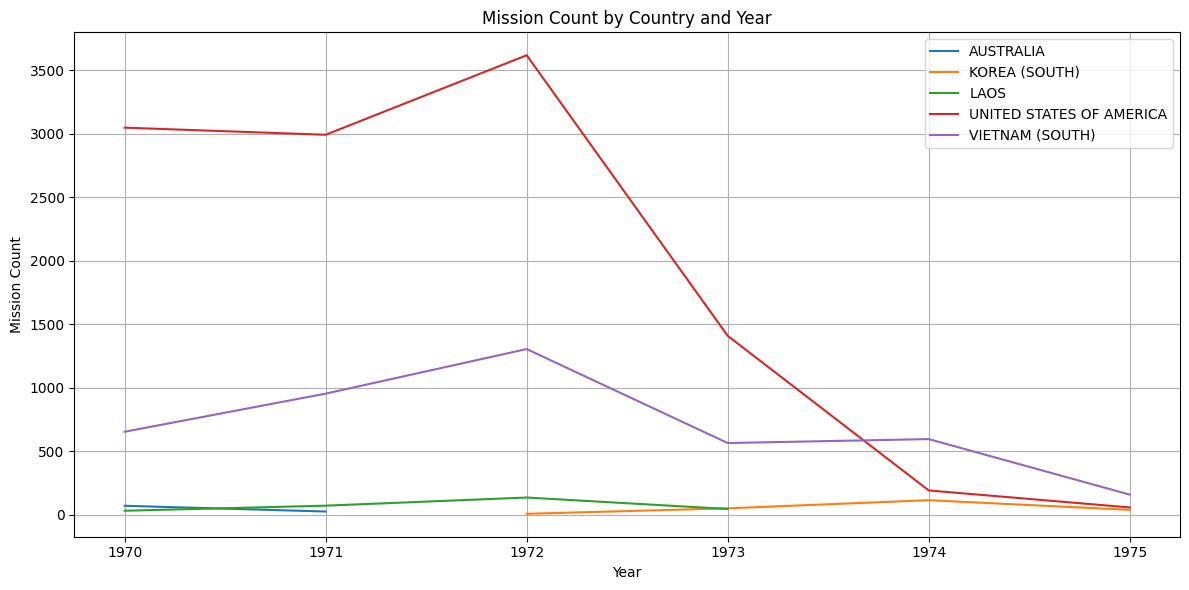

In [23]:
missions_by_year = df_bombing.groupby(["mission_year", "country_flying_mission"]).size().reset_index(name="MissionCount")
missions_by_year = missions_by_year.sort_values(by="mission_year")
print(missions_by_year.head())

missions_by_year["mission_year"] = missions_by_year["mission_year"].astype(int)

fig = plt.figure(figsize=(12, 6))

for country, missions in missions_by_year.groupby("country_flying_mission"):
    missions = missions.sort_values("mission_year")
    plt.plot(missions["mission_year"], missions["MissionCount"], label=country)

plt.legend(loc='best')
plt.xlabel("Year")
plt.ylabel("Mission Count")
plt.title("Mission Count by Country and Year")
plt.grid(True)
plt.tight_layout()
plt.show()

  mission_year target_country  MissionCount
0         1970       CAMBODIA           209
1         1970           LAOS          1530
2         1970  NORTH VIETNAM            93
3         1970  SOUTH VIETNAM          1487
4         1970       THAILAND            82


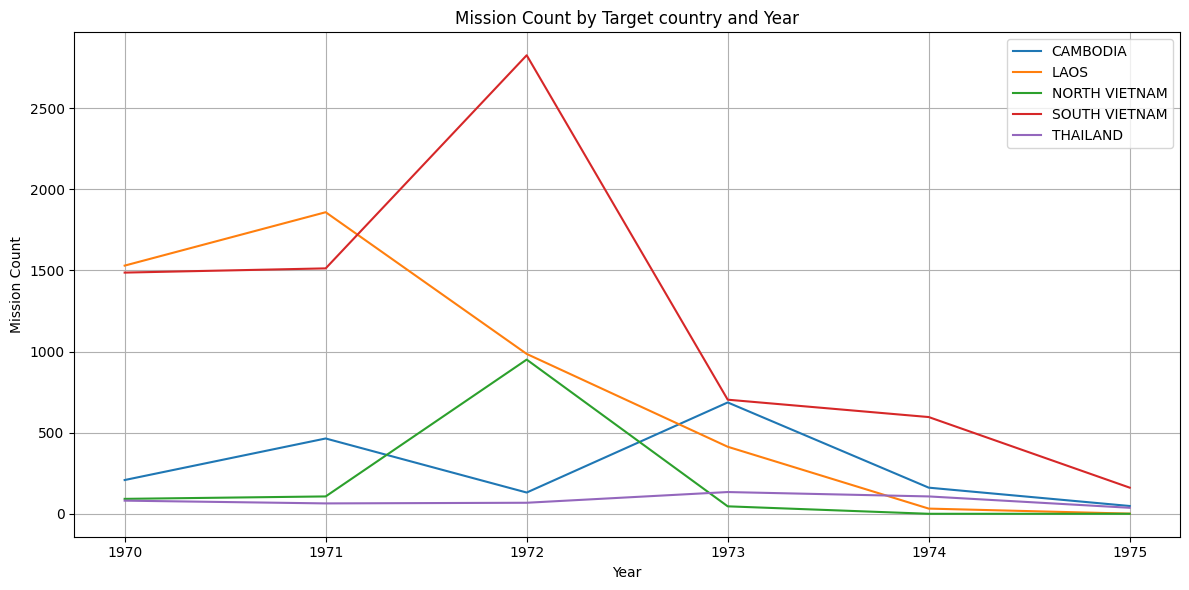

In [24]:
missions_by_tgtcountry = df_bombing.groupby(["mission_year", "target_country"]).size().reset_index(name="MissionCount")
missions_by_tgtcountry = missions_by_tgtcountry.sort_values(by="mission_year")
print(missions_by_tgtcountry.head())

missions_by_tgtcountry["mission_year"] = missions_by_tgtcountry["mission_year"].astype(int)

fig = plt.figure(figsize=(12, 6))

for country, missions in missions_by_tgtcountry.groupby("target_country"):
    missions = missions.sort_values("mission_year")
    plt.plot(missions["mission_year"], missions["MissionCount"], label=country)

plt.legend(loc='best')
plt.xlabel("Year")
plt.ylabel("Mission Count")
plt.title("Mission Count by Target country and Year")
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-36-62555a5ed18d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10_takeoff, x='take_off_location', y='MissionCount', palette='viridis')


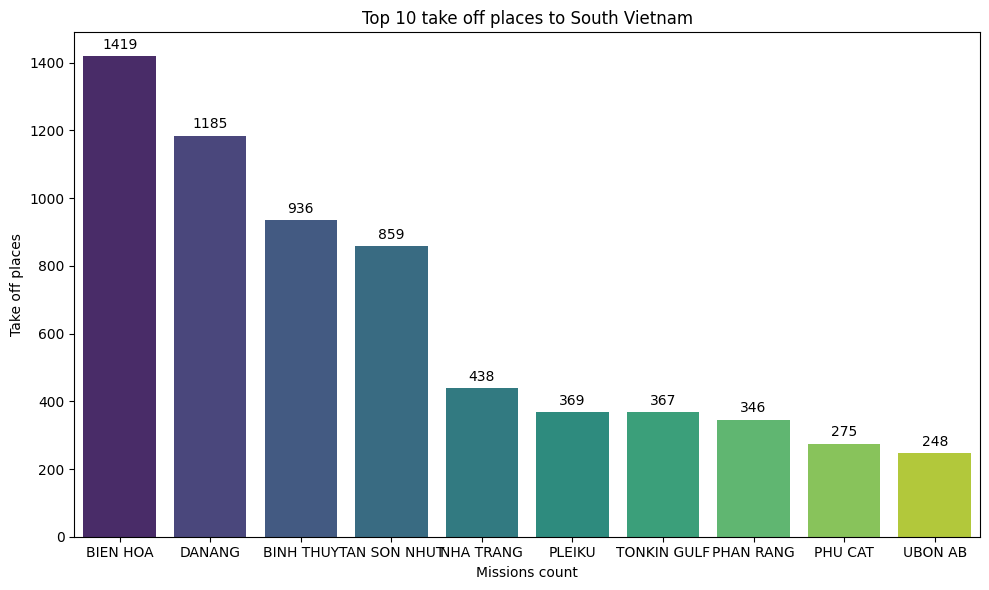

In [36]:
df_south_vn = df_bombing[df_bombing['target_country'] == 'SOUTH VIETNAM']

df_takeoff_location = df_south_vn.groupby('take_off_location').size().reset_index(name='MissionCount')
df_takeoff_location = df_takeoff_location.sort_values(by='MissionCount', ascending = False)
top10_takeoff = df_takeoff_location.head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top10_takeoff, x='take_off_location', y='MissionCount', palette='viridis')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

plt.title('Top 10 take off places to South Vietnam')
plt.xlabel('Missions count')
plt.ylabel('Take off places')
plt.tight_layout()
plt.show();


<ipython-input-38-23794a1e8b8b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10_result, x='result_bombing', y='MissionCount', palette='magma')


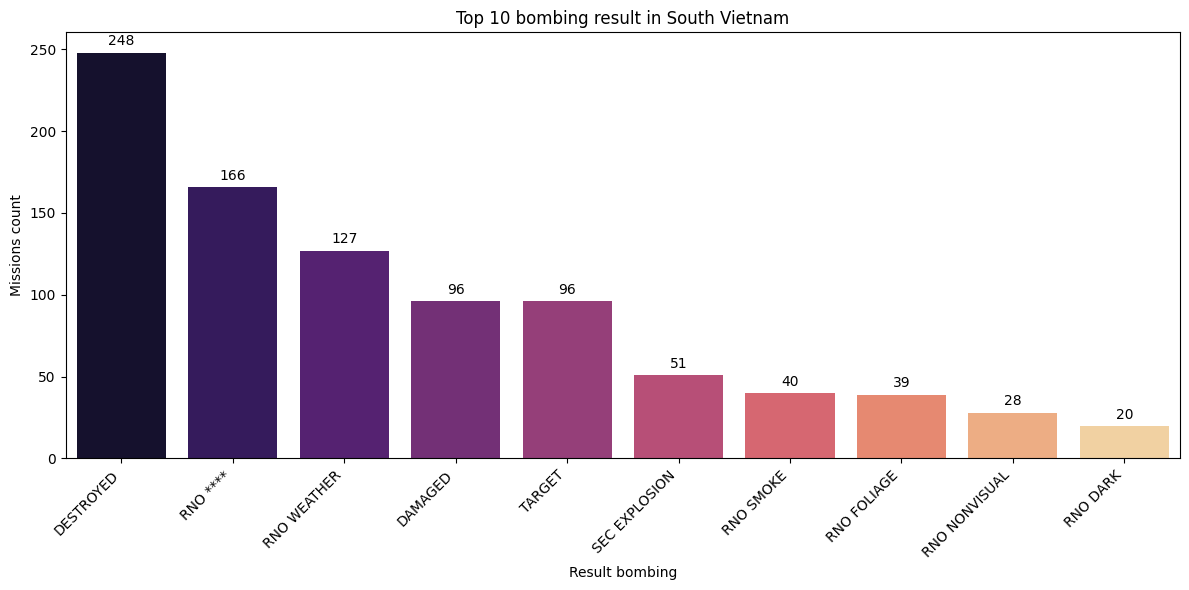

In [38]:
df_southvn_result = df_south_vn.groupby('result_bombing').size().reset_index(name='MissionCount')
df_southvn_result = df_southvn_result.sort_values(by='MissionCount', ascending = False)
top10_result = df_southvn_result.head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top10_result, x='result_bombing', y='MissionCount', palette='magma')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

plt.title('Top 10 bombing result in South Vietnam')
plt.xlabel('Result bombing')
plt.ylabel('Missions count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-59-f97da70568da>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_avg_time, x='result_bombing', y='AverageTime', palette='coolwarm')


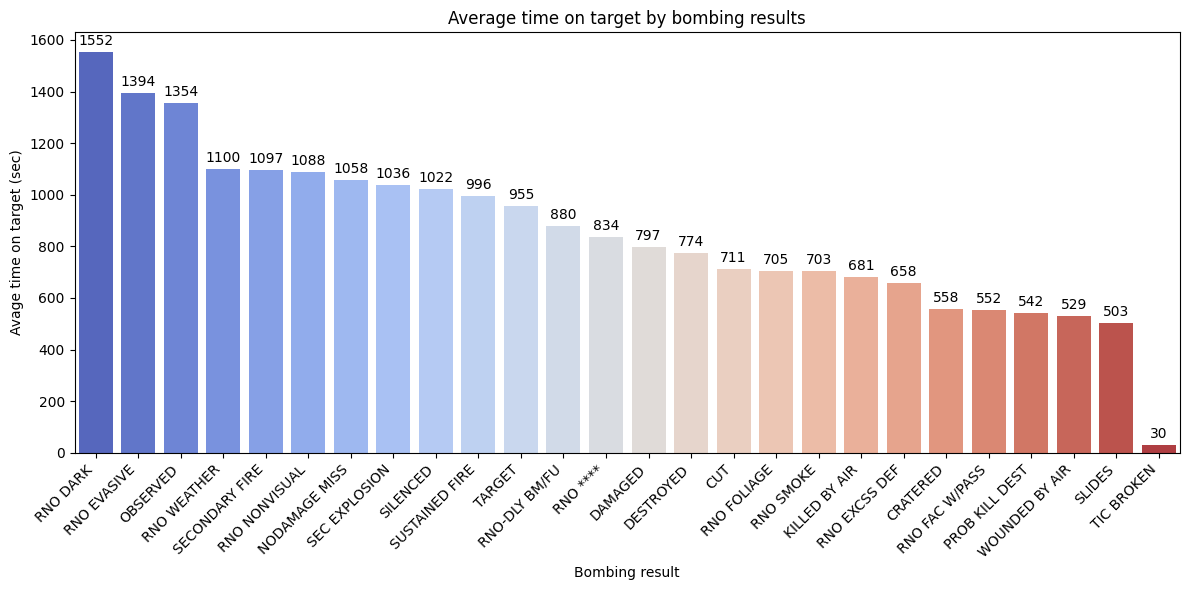

In [59]:
df_valid = df_bombing[['result_bombing', 'TIMEONTARGET']].dropna()

df_avg_time = df_valid.groupby('result_bombing')['TIMEONTARGET'].mean().reset_index(name = 'AverageTime')

df_avg_time = df_avg_time.sort_values(by='AverageTime', ascending = False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_avg_time, x='result_bombing', y='AverageTime', palette='coolwarm')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

plt.title('Average time on target by bombing results')
plt.xlabel('Bombing result')
plt.ylabel('Avage time on target (sec)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()